# Logistic Regression from Scratch
This code is an adaptation of the code from a Medium article by [Koushik](https://medium.com/@koushikkushal95/logistic-regression-from-scratch-dfb8527a4226#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImFjM2UzZTU1ODExMWM3YzdhNzVjNWI2NTEzNGQyMmY2M2VlMDA2ZDAiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMTUzMzU3MDA2ODM3MjU3NDUwMjIiLCJlbWFpbCI6Im10a2FsaXNoQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJuYmYiOjE3MTQ5NTA0OTMsIm5hbWUiOiJNaWNoYWVsIEthbGlzaCIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQ2c4b2NJQUxKa0dPZkwtVzJjb3R2ejJQSW1yMzNkc1BKeVo2ZlNaS0NUTUdad1JSNUtvS2RJPXM5Ni1jIiwiZ2l2ZW5fbmFtZSI6Ik1pY2hhZWwiLCJmYW1pbHlfbmFtZSI6IkthbGlzaCIsImlhdCI6MTcxNDk1MDc5MywiZXhwIjoxNzE0OTU0MzkzLCJqdGkiOiI4NGM0MzMwMzljODBhZTNjNjE2YmY3NGQ3OGIzNDY0Y2RkN2YzY2Y4In0.njudRFk-Sz_AgH1owe-noHRdWzkoKXcxM_eWIDegKDuePvjlMg-wzwjO07zVj_Kp_sD6XTLexuoxUY-5G00O5ec2XLK_kjVGokSFvOB9S4QINy5ApI-_kk7P-BABdTytmYsMzqDclUaV-6wBDr3BKE5W9NW9YEWGtddpy2HJi_d1I1ZCutvrlwDgeGzaQLgC-UUiSATzEZC76-CPXDg_sTi25MPiqjya2_GyVhb6mEt64Q2BNJynvkfHrmutWe4bQOy-Kndq7941nY8jWh6VNkKZ5ZVuU-5HzyG3HLMWc9oF6ATqN9ppildD-FPRtD892P2zFdmzklbf02OMtBCcGg)

In [110]:
# Data handling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data and pre-processing
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix

In [127]:
# Load dataset
dataset = datasets.load_breast_cancer()

# Define data and target
X, y = dataset.data, dataset.target 

print(X[0], '\n', y[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 
 0


In [ ]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [184]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=5):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []
        self.val_losses = []
         
    #Sigmoid method
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Binary cross entropy (BCE)
    def compute_loss(self, y_true, y_pred):
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2) 

    def feed_forward(self,X):
        z = np.dot(X, self.weights) + self.bias
        logits = self._sigmoid(z)
        return logits

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features, 1) * np.sqrt(2. / n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):

            # Generate logits
            logits = self.feed_forward(X)

            # Compute loss
            loss = self.compute_loss(y, logits)
            self.losses.append(loss)
            
            if X_val is not None and y_val is not None:
                logits_val = self.feed_forward(X_val)
                val_loss = self.compute_loss(y_val, logits_val)
                self.val_losses.append(val_loss)
            
            # Get derivatives of sigma, weights and bias
            dz = logits - y.reshape(-1, 1)
            dw = (1 / n_samples) * np.dot(X.T, dz)
            db = (1 / n_samples) * np.sum(dz)
            
            # Update
            self.weights -= self.lr * dw
            self.bias -= self.lr * db


    def predict(self, X):
        logits = self.feed_forward(X)
        y_predicted_cls = [1 if logit > 0.5 else 0 for logit in logits.flatten()]
        y_pred = np.array(y_predicted_cls)
        y_prob = logits.flatten()
        return y_pred, y_prob


    def evaluate(self, y_true, y_pred, y_prob, beta=1.2, type="TRAINING"):

        # Calculate results
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        cm  = confusion_matrix(np.asarray(y_true), np.asarray(y_pred))
        auc = roc_auc_score(y_true, y_prob)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        f2 = fbeta_score(y_true, y_pred, beta=beta)

        # Print results
        print(f"{type} PERFORMANCE:")
        print(f"Accuracy: {accuracy:.2f},\nPrecision: {precision:.2f}\nRecall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}\nF2 Score (beta={beta}): {f2:.2f}\nROC AUC: {auc:.2f}")
        print("Confusion Matrix\n",np.array(cm))
        print("Classsification Report\n", classification_report(y_true, y_pred))
    
    def loss_curve(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.losses, label='Training Loss')
        plt.plot(self.val_losses, label='Validation Loss')
        plt.title('Loss Curve')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Create the logistic regression model instance
model = LogisticRegression(learning_rate=0.1, n_iters=10)

# Train the model
model.fit(X_train, y_train, X_test, y_test)

# Evaluate performance

In [185]:
def performance_results(X, y, beta, type):
    y_pred, y_prob = model.predict(X)
    model.evaluate(y, y_pred, y_prob, beta, type)
    return y_pred, y_prob
    
y_pred_test, y_prob_test = performance_results(X_train, y_train, beta=1.2, type="TRAIN")

TRAIN PERFORMANCE:
Accuracy: 0.91,
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
F2 Score (beta=1.2): 0.93
ROC AUC: 0.97
Confusion Matrix
 [[150  19]
 [ 20 266]]
Classsification Report
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       169
           1       0.93      0.93      0.93       286

    accuracy                           0.91       455
   macro avg       0.91      0.91      0.91       455
weighted avg       0.91      0.91      0.91       455



In [186]:
y_pred_test, y_prob_test = performance_results(X_test, y_test, beta=1.2, type="TEST")

TEST PERFORMANCE:
Accuracy: 0.94,
Precision: 0.97
Recall: 0.93
F1 Score: 0.95
F2 Score (beta=1.2): 0.95
ROC AUC: 0.99
Confusion Matrix
 [[41  2]
 [ 5 66]]
Classsification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.97      0.93      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



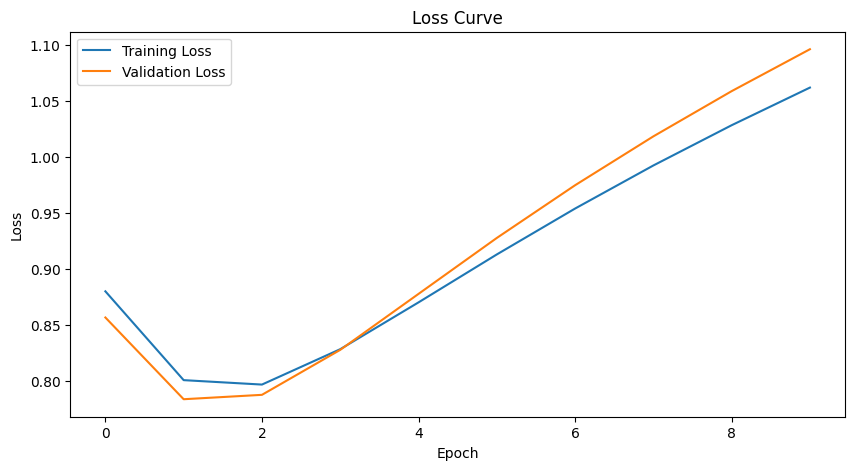

In [187]:
model.loss_curve()